### Perzeptron

 


Lets use a perzeptron to distinguish [reflected signals of a Sonar](http://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29) from metal barrel or rock. Over all there are 111 frequency spectra for rocks and 97 metal barrels. Each example has 60 canals, indicating the intensity of a frequence.


#### How to say yes or no in math
The heaviside function...
$$
H[x]=\begin{cases} 0, & x < 0, \\ 1, & x \ge 0, \end{cases} 
$$


In [1]:
def heaviside(x): 
    if x < 0:
        return 0
    else:
        return 1

In [2]:
import numpy as np 
data = np.genfromtxt(
    './../data/sonar-mine-rock.csv', 
    delimiter=',', 
    converters={ 
        -1: lambda s: 1.0 if s == b'M' else 0.0
    })

With `delimiter=','` we tell the function that values in the file are seperated by commas, and `converters` the values in the last column, from M to 1 and R to 0, respectivally.

In [3]:
#help(np.genfromtxt)

In [4]:
print(data.shape)

(208, 61)


#### Have a look in the data


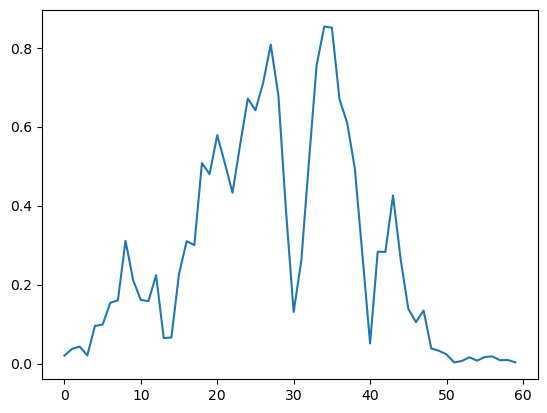

In [5]:
import matplotlib.pyplot as plt
plt.plot(data[0,0:60]) # 

In [6]:
print(data[:,-1]) # last row, 0.0 for rock

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Die -1 ist übrigens eine Möglichkeit, mit numpy vom anderen Ende her zu schauen, und -1 ist dann nach dem Komma also die letzte Spalte, -2 wäre die vorletzte Spalte gewesen usw. Das haben wir oben beim Laden der Daten schon genutzt, als wir einen Konverter für die letzte Spalte gebaut haben.

Ja, da kommt eine 0.0. So sieht also ein Sonarbild von einem Felsen aus. Wer hätte das gedacht? Da die Daten sortiert eingelesen wurden, können wir uns auch mal das letzte Sonarbild anschauen, denn das ist eines von einem Metallzylinder:

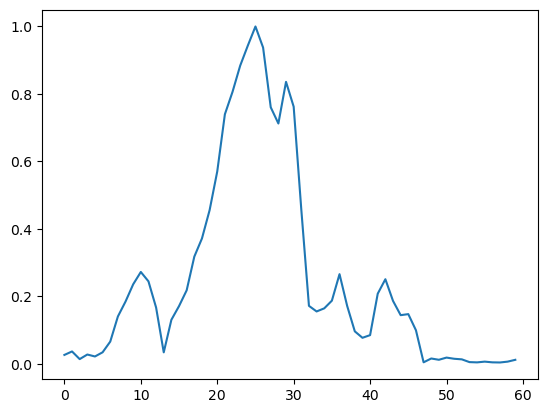

In [7]:
plt.plot(data[-1,0:60]) #last line... a metal cylinder

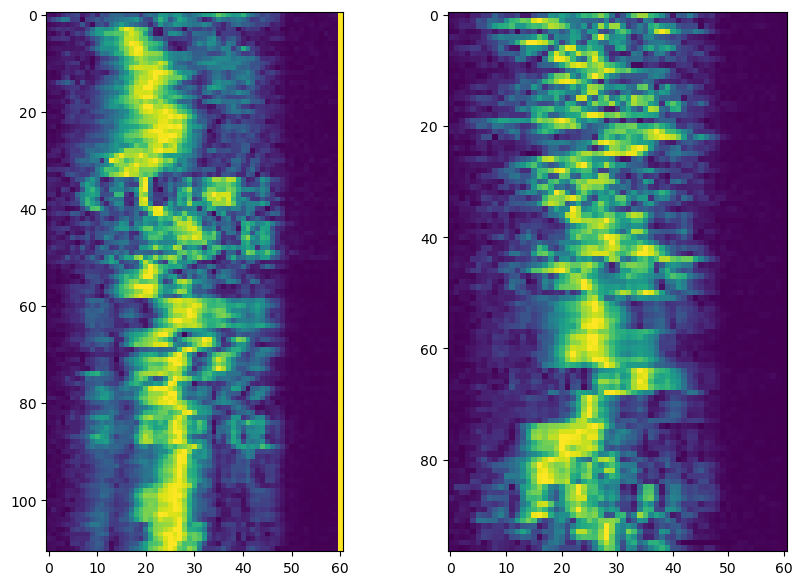

In [8]:
#view all data, case specific
# create figure
fig = plt.figure(figsize=(10, 7))

  
# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
plt.imshow(data[data[:, -1] == 1, :])

fig.add_subplot(1, 2, 2)
plt.imshow(data[data[:, -1] == 0, :])

In [9]:
print(data.shape, "original data")

fulldata = np.insert(data, 0, 1, axis=1) #adding a column with only ones, for mathematical reasons

print(fulldata.shape, "data with bias neuron")

(208, 61) original data
(208, 62) data with bias neuron


In [10]:
print(fulldata[:,0]) # Alle Zeilen, von denSpalten nur 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Mixing up the data to split it into two representative sets for training and testing

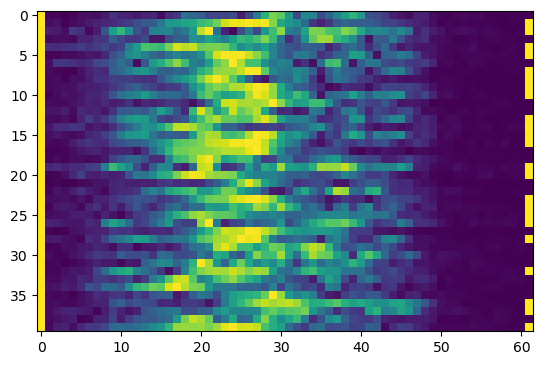

In [11]:
np.random.shuffle(fulldata) #here fulldata is changed... overwritten
plt.imshow(fulldata[:40,:]) #watch the random

Splitting the data.

In [12]:
testdata = fulldata[0:31,:]
training = fulldata[31:,:]

In [13]:
!pip install tqdm

In [14]:
weights = np.random.rand(61) # wait for the end... weigts are multiplied with input values
epochs = 1000
alpha = 0.001

In [15]:
from tqdm import tqdm # allows for the generation of progress bars in Python

errors = [] # save the error of the network for every training epoch

# iterate over epochs with nice waiting bar
for epoche in tqdm(range(0, epochs)):
    
    error = 0 # every epoch starts with an error of 0
    #first guess will be right, bias set to 1
    np.random.shuffle(training) # play the game... every epoche is well mixed
    
    # looping over the spectras
    for i in range(0, len(training)):
        
        inputs = training[i, 0:61] # First 61 columns are Bias and 60 characteristics (frequency band)
        target = training[i, -1]   # Last column is 1 for metall or 0 for Rock
        
        # ok this is the heaviside with the scaleproduct of inputs and weights, making a decission
        output = np.heaviside(inputs.dot(weights), 1.0)
        
        # calculation success
        delta = target - output
        
        # learning... change nothing if network is right... or change with alpha
        if (delta != 0):
            error += 1
            weights += delta * inputs * alpha # numpys matrix multiplication
    
    errors.append(error)    

100%|██████████| 1000/1000 [00:00<00:00, 1265.74it/s]


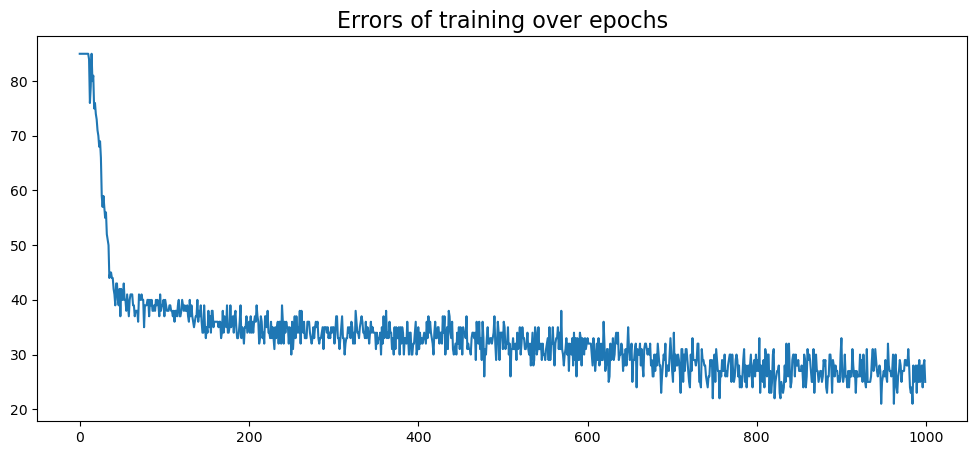

In [16]:
plt.figure(figsize=(12,5)) 
plt.plot(errors)
_ = plt.title("Errors of training over epochs", fontsize=16)

## Is our little network able to classify data that it dit not seen before.

In [17]:
cnt_errors = 0

# presenting all lines of testdata
for test in testdata:

    #What happens when we apply test data to the network with trained weights?
    #weights are not anymore random...
    o = np.heaviside(test[0:61].dot(weights), 1.)
    
    # compare last value, with responce
    delta = test[-1] - o
    
    # error arraised?
    if delta != 0.0:
        cnt_errors += 1 

# calculate the quality as a percentage
cnt_data = len(testdata)
recognized_data =  (cnt_data - cnt_errors ) / cnt_data

print ("Quality of responce: {:0.2f}".format(recognized_data))

Quality of responce: 0.74


### Fazit
In 4 of 5 cases the network gives a correct answer. Better then guessed.

### Self experiences

- In this example all depended from random numbers (hazardius dependences). Run that script several times and observe the variations.

- Change the learning rate. How does it change the plottet errors over epochs?

- Our model could be formulated as $H(i \bullet w)$). Make a test with random weights and not trained.

- Remember, neural networks can be over trained (good trainings but bad tests), or aftertrained and there are many more models than a dot product.

 

### Downloads

fork the source

[neuromant.de-Tutorials auf Github](https://github.com/dannybusch/neuromant.de-Tutorials)

 